# Data Analysis

In [2]:
import pandas as pd

In [4]:
temp = pd.read_csv('clean.csv')

In [5]:
temp

,userID,itemID,category,behavior,date,time
0,1,2576651,149192,pv,2017-11-25,01:21:25
1,1,3830808,4181361,pv,2017-11-25,07:04:53
2,1,4365585,2520377,pv,2017-11-25,07:49:06
3,1,4606018,2735466,pv,2017-11-25,13:28:01
4,1,230380,411153,pv,2017-11-25,21:22:22
...,...,...,...,...,...,...
98914479,999999,4797808,11120,pv,2017-12-03,09:30:03
98914480,999999,4613472,4602841,pv,2017-12-03,09:36:06
98914481,999999,3647364,2304296,pv,2017-12-03,09:36:32
98914482,999999,1903801,2304296,pv,2017-12-03,09:37:07


In [12]:
temp2 = temp[temp['behavior']=='buy']

In [17]:
temp3 = temp[temp['behavior']=='pv']

In [18]:
temp4 = temp[temp['behavior']=='cart']

In [19]:
temp5 = temp[temp['behavior']=='fav']

##### 1. Number of Users, Items, Catagories

In [6]:
print(f"The unique value of userID: {temp['userID'].nunique()}")
print(f"The unique value of itemID: {temp['itemID'].nunique()}")
print(f"The unique value of category: {temp['category'].nunique()}")
print()
print(f"The min date is {temp['date'].min()} and the max date is {temp['date'].max()}")
print(f"The unique value of date is {temp['date'].nunique()}")

The unique value of userID: 987984
The unique value of itemID: 4142583
The unique value of category: 9435

The min date is 2017-11-25 and the max date is 2017-12-03
The unique value of date is 9


###### 2. The Mean and Median number of interactions(users)

In [8]:
interactions_per_user = temp.groupby('userID').size()

In [9]:
print(f"The mean number of interaction is: {interactions_per_user.mean()}")
print(f"The median number of interaction is: {interactions_per_user.median()}")

The mean number of interaction is: 100.11749582989198
The median number of interaction is: 74.0


###### 3. Top 10 Users/Category, Distribution across categories  ?????????

In [10]:
user_unique_categories = (
    temp.groupby('userID')['category']
    .nunique()
    .reset_index(name='unique_categories_count')
    .sort_values(by='unique_categories_count', ascending=False)
)

In [11]:
user_unique_categories

,userID,unique_categories_count
819867,844889,317
775068,799004,268
186677,192647,243
49830,51408,242
980343,1010152,231
...,...,...
609398,628556,1
138780,143173,1
709793,731822,1
892153,919389,1


In [13]:
user_unique_categories2 = (
    temp2.groupby('userID')['category']
    .nunique()
    .reset_index(name='unique_categories_count')
    .sort_values(by='unique_categories_count', ascending=False)
)

In [14]:
user_unique_categories2

,userID,unique_categories_count
70213,107013,74
321771,490508,70
461013,702034,68
283836,432739,63
447045,681083,60
...,...,...
206191,314844,1
206189,314838,1
206187,314835,1
206181,314827,1


###### 4. Top 10 Items/Category

In [15]:
item_buy_count = temp2.groupby('itemID').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [16]:
item_buy_count

,itemID,count
384636,3122135,1408
373458,3031354,942
488667,3964583,671
315233,2560262,658
365137,2964774,614
...,...,...
267490,2171127,1
267488,2171122,1
267487,2171120,1
267484,2171087,1


In [20]:
item_pv_count = temp3.groupby('itemID').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [21]:
item_cart_count = temp4.groupby('itemID').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [22]:
item_fav_count = temp5.groupby('itemID').size().reset_index(name='count').sort_values(by='count', ascending=False)

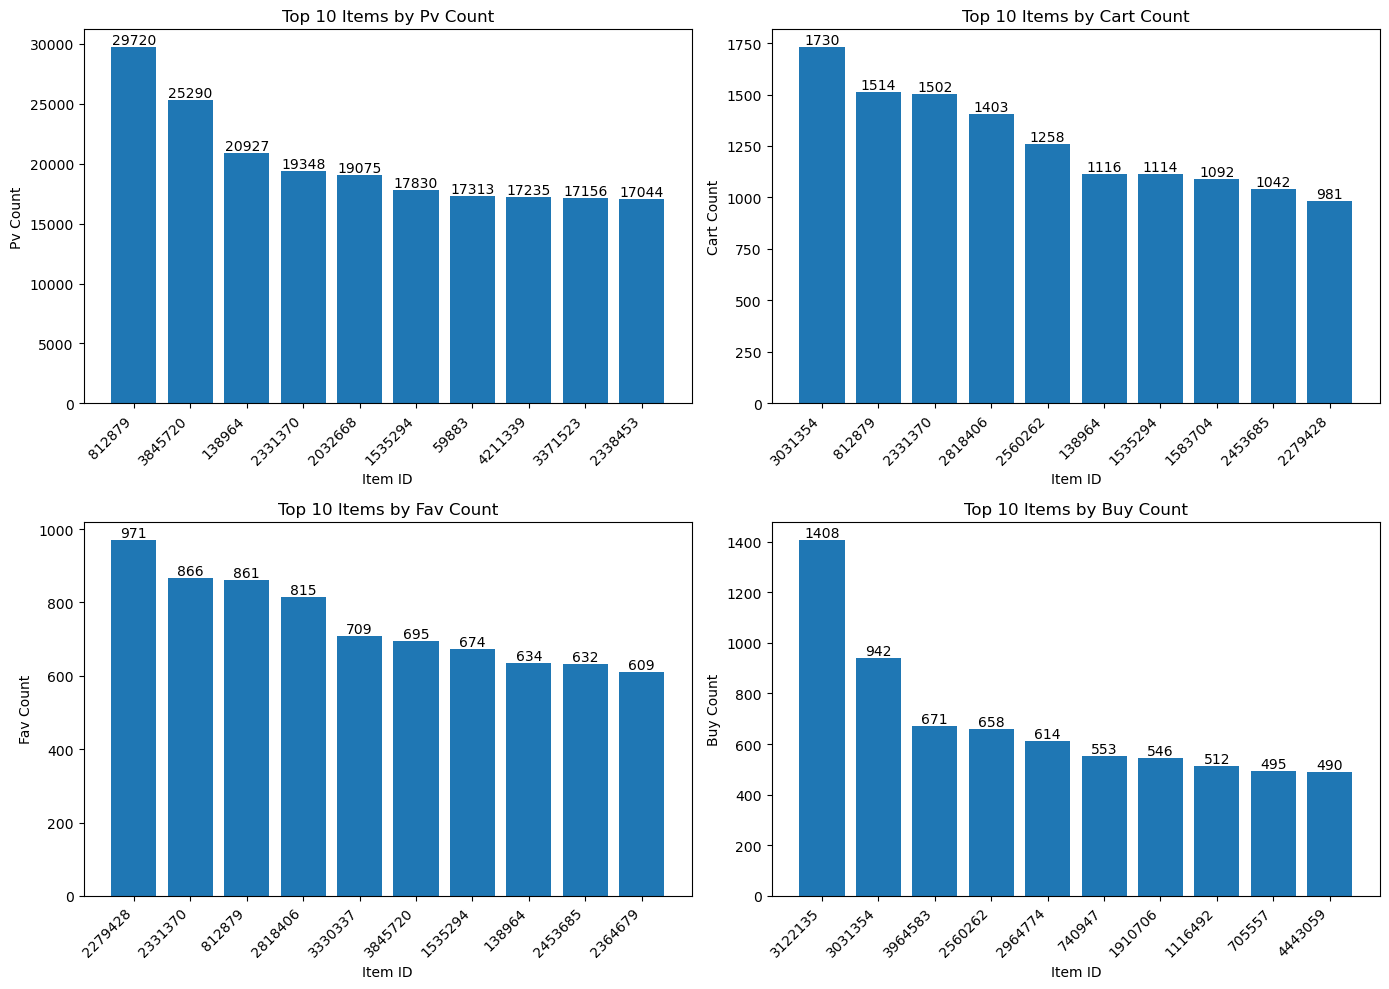

In [37]:
import matplotlib.pyplot as plt

top10_items_dfs = [df.head(10) for df in [item_pv_count, item_cart_count, item_fav_count, item_buy_count]]
behavior_temp = ['Pv','Cart','Fav','Buy']

plt.figure(figsize=(14,10))

for i, top10_items in enumerate(top10_items_dfs, 1):
#     print(i)
    plt.subplot(2, 2, i)
    plt.bar(top10_items['itemID'].astype(str), top10_items['count'])
    plt.title(f'Top 10 Items by {behavior_temp[i-1]} Count')
    plt.xlabel('Item ID')
    plt.ylabel(f'{behavior_temp[i-1]} Count')
    plt.xticks(rotation=45, ha='right')  # 旋转
    
    for index, value in enumerate(top10_items['count']):  # 添加具体数值
        plt.text(index, value, str(value), ha='center', va='bottom')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

##### 5. User jouney (whether it means the User Conversion Rate ???)

In [38]:
behavior_counts = temp.groupby(['userID', 'behavior']).size().unstack(fill_value=0)

MemoryError: Unable to allocate 94.3 MiB for an array with shape (98914484,) and data type bool

In [ ]:
behavior_counts